<div style="text-align: center;">
    <h1>Child Abuse in Los Angeles (2020-2023)</h1>
</div>

##### Done by:- Narendra Rajendra Rane

## Introduction

The primary goal of this project is to analyze and understand the patterns of child abuse cases reported in Los Angeles from 2020 to 2023. Child abuse, particularly physical assault, is a critical issue that has a lasting impact on children and communities. By studying the data, we aim to identify trends in abuse, understand the demographics of victims, and explore potential relationships between abuse and other factors such as location, weapon used, and the time of the incident.

Over the last few years, Los Angeles has seen a significant number of child abuse cases, some of which have led to serious consequences for the victims involved. The data we are using comes from official reports of child abuse incidents, which provide us with valuable insights into the nature of these crimes.

In this analysis, we will focus on the following aspects:

- **Data Collection:** Gathering and preparing data related to child abuse cases, including details such as the age, sex, and location of the victims.
- **Data Processing:** Cleaning and transforming the data for further analysis, ensuring that we handle missing values and outliers appropriately.
- **Exploratory Analysis & Data Visualization:** Visualizing and summarizing the data to uncover any meaningful patterns or trends.
- **Model: Analysis, Hypothesis testing & ML:** Using machine learning and statistical techniques to make predictions, identify factors contributing to abuse, and gain insights.
- **Interpretation(Insight & Policy Decision):** Drawing conclusions from the analysis to make policy recommendations aimed at addressing child abuse and improving the safety and well-being of children in Los Angeles.

### Why is this important?

Child abuse is a serious societal issue that affects the most vulnerable members of our communities. By identifying the factors associated with abuse and understanding the demographics of affected children, we can better allocate resources and create interventions to prevent future incidents. Furthermore, this project aims to shed light on the patterns of abuse that might otherwise go unnoticed, providing a clearer picture of where and how interventions can be most effective.

The goal of this project is to not only analyze the trends but also provide actionable insights that can help in preventing child abuse in Los Angeles, and, by extension, contribute to efforts in other regions with similar issues.



## Data Collection

For this project, we analyzed data from official Los Angeles crime reports spanning 2020 to 2023. The dataset includes detailed information about various criminal activities, such as the type of crime, date and time of occurrence, victim demographics, location, and other related variables. 

We focused specifically on child abuse cases categorized as **"CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT."** This required filtering the dataset to isolate records matching this crime description. This step ensures that the analysis is concentrated on relevant incidents, enabling us to derive meaningful insights into child abuse trends in Los Angeles.

The dataset was sourced from [Data.gov](https://catalog.data.gov/dataset/crime-data-from-2020-to-present), a platform that provides public access to a wide range of datasets for research and analysis. It was loaded into a pandas DataFrame for manipulation and analysis. Libraries such as NumPy, pandas, Matplotlib, and Seaborn were utilized for data handling and visualization. Additionally, advanced techniques like hypothesis testing and machine learning were made possible with libraries such as Scikit-learn, while tools like Folium allowed for geographical visualization.

### Tools and Environment

The analysis was conducted using **Jupyter Notebook**, a powerful interactive environment for data science and machine learning workflows. It enables seamless integration of code, visualizations, and narrative text, making it an ideal choice for this project.

You can learn more about Jupyter Notebook and its features by visiting the [Jupyter Notebook website](https://jupyter.org/).


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy.stats import ttest_ind, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [24]:
# Load the data from the CSV file (replace 'file_path' with the actual file path)
file_path = 'Crime_Data_from_2020_to_Present.csv'  # Change this to the actual path if different
df = pd.read_csv(file_path)

# Filter the DataFrame where "Crm Cd Desc" contains the value of interest
filtered_df = df[df['Crm Cd Desc'] == "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT"]

# Display the filtered data
filtered_df.head(10)

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
207  231906446  02/28/2023 12:00:00 AM  02/17/2020 12:00:00 AM      1200   
246  220506019  02/01/2022 12:00:00 AM  02/01/2020 12:00:00 AM      1200   
495  220917252  12/13/2022 12:00:00 AM  12/21/2020 12:00:00 AM      1800   
556  221222580  10/30/2022 12:00:00 AM  06/01/2020 12:00:00 AM      1500   
727  221715285  10/26/2022 12:00:00 AM  01/01/2020 12:00:00 AM      1200   
750  231008955  05/09/2023 12:00:00 AM  01/09/2020 12:00:00 AM         1   
771  232104840  01/18/2023 12:00:00 AM  12/01/2020 12:00:00 AM      1200   
855  221610929  07/30/2022 12:00:00 AM  07/01/2020 12:00:00 AM      1200   
887  221319458  10/17/2022 12:00:00 AM  09/01/2020 12:00:00 AM      1200   
996  220309997  05/02/2022 12:00:00 AM  11/01/2020 12:00:00 AM      1200   

     AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
207    19      Mission         1974         2     627   
246     5       Harbor          507         2     627   
495     9     Van Nuys          916         2     627   
556    12  77th Street         1267         2     627   
727    17   Devonshire         1708         2     627   
750    10  West Valley         1028         2     627   
771    21      Topanga         2101         2     627   
855    16     Foothill         1695         2     627   
887    13       Newton         1367         2     627   
996     3    Southwest          393         2     627   

                                 Crm Cd Desc  ... Status   Status Desc  \
207  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT  ...     AA  Adult Arrest   
246  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT  ...     AO   Adult Other   
495  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT  ...     AO   Adult Other   
556  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT  ...     AO   Adult Other   
727  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT  ...     IC   Invest Cont   
750  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT  ...     AO   Adult Other   
771  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT  ...     AO   Adult Other   
855  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT  ...     AO   Adult Other   
887  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT  ...     IC   Invest Cont   
996  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT  ...     AA  Adult Arrest   

    Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
207    627.0      NaN       NaN      NaN   
246    627.0      NaN       NaN      NaN   
495    627.0      NaN       NaN      NaN   
556    627.0      NaN       NaN      NaN   
727    627.0      NaN       NaN      NaN   
750    627.0      NaN       NaN      NaN   
771    627.0      NaN       NaN      NaN   
855    627.0      NaN       NaN      NaN   
887    627.0      NaN       NaN      NaN   
996    627.0      NaN       NaN      NaN   

                                     LOCATION  \
207   9000    WILLIS                       AV   
246   1400 W  227TH                        ST   
495                                   VANOWEN   
556    800 W  83RD                         ST   
727  12000    SUSAN                        DR   
750  16500    VANOWEN                      ST   
771   9300    GLADE                        AV   
855  11000    ARMINTA                      ST   
887           31ST                         ST   
996   4100    LEIMERT                      BL   

                        Cross Street      LAT       LON  
207                              NaN  34.2337 -118.4553  
246                              NaN  33.8201 -118.3015  
495                          WOODMAN  34.1939 -118.4313  
556                              NaN  33.9636 -118.2871  
727                              NaN  34.2880 -118.4971  
750                              NaN  34.1939 -118.4924  
771                              NaN  34.2393 -118.6090  
855                              NaN  34.2139 -118.3703  
887  GRIFFITH                     AV  33.9993 -118.2432  
996                              NaN  34.0098 -118.3242  

[10 rows x 28 columns]

## Data Processing

Once the data was collected, it was essential to process it to ensure that only the most relevant information was retained for analysis. This step involved filtering and structuring the dataset to focus specifically on child abuse cases and their associated attributes.

### Steps in Data Processing:

1. **Column Selection**:
   - To streamline the analysis, only the columns that provide meaningful insights into the incidents were retained. These include:
     - **Dates**: Reported date and occurrence date (`Date Rptd`, `DATE OCC`, `TIME OCC`)
     - **Location Information**: Area code and name (`AREA`, `AREA NAME`)
     - **Crime Details**: Crime code, description, and weapon details (`Crm Cd`, `Crm Cd Desc`, `Weapon Used Cd`, `Weapon Desc`)
     - **Victim Demographics**: Victim age and gender (`Vict Age`, `Vict Sex`)
     - **Premises Information**: Premises code and description (`Premis Cd`, `Premis Desc`)
     - **Crime Status**: Case resolution status (`Status`, `Status Desc`)
     - **Geographical Coordinates**: Latitude and longitude (`LAT`, `LON`)

2. **Output**:
   - The processed data, with only the selected columns, was stored in a new DataFrame named `df_child_abuse_physical`.
   - A preview of the processed dataset was displayed to verify the structure and content.

By filtering and retaining only the relevant columns, we reduced the dataset size and ensured that it was ready for exploratory analysis and visualization. This structured approach simplifies the subsequent steps in the Data Science lifecycle.


In [25]:
# Define the specific columns you want to keep
columns_to_keep = [
    "Date Rptd", "DATE OCC", "TIME OCC", "AREA", "AREA NAME", 
    "Crm Cd", "Crm Cd Desc", "Vict Age", "Vict Sex", 
    "Premis Cd", "Premis Desc", "Weapon Used Cd", 
    "Weapon Desc", "Status", "Status Desc","LAT","LON"
]

# Filter for "Child Abuse" with specific columns
df_child_abuse_physical = filtered_df[columns_to_keep]

# Display each DataFrame separately with only the selected columns
df_child_abuse_physical.head(10)   

Date Rptd                DATE OCC  TIME OCC  AREA  \
207  02/28/2023 12:00:00 AM  02/17/2020 12:00:00 AM      1200    19   
246  02/01/2022 12:00:00 AM  02/01/2020 12:00:00 AM      1200     5   
495  12/13/2022 12:00:00 AM  12/21/2020 12:00:00 AM      1800     9   
556  10/30/2022 12:00:00 AM  06/01/2020 12:00:00 AM      1500    12   
727  10/26/2022 12:00:00 AM  01/01/2020 12:00:00 AM      1200    17   
750  05/09/2023 12:00:00 AM  01/09/2020 12:00:00 AM         1    10   
771  01/18/2023 12:00:00 AM  12/01/2020 12:00:00 AM      1200    21   
855  07/30/2022 12:00:00 AM  07/01/2020 12:00:00 AM      1200    16   
887  10/17/2022 12:00:00 AM  09/01/2020 12:00:00 AM      1200    13   
996  05/02/2022 12:00:00 AM  11/01/2020 12:00:00 AM      1200     3   

       AREA NAME  Crm Cd                              Crm Cd Desc  Vict Age  \
207      Mission     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         5   
246       Harbor     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        12   
495     Van Nuys     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         5   
556  77th Street     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        10   
727   Devonshire     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         5   
750  West Valley     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         3   
771      Topanga     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        14   
855     Foothill     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        12   
887       Newton     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        13   
996    Southwest     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        10   

    Vict Sex  Premis Cd                                   Premis Desc  \
207        F      501.0                        SINGLE FAMILY DWELLING   
246        M      501.0                        SINGLE FAMILY DWELLING   
495        M      501.0                        SINGLE FAMILY DWELLING   
556        F      501.0                        SINGLE FAMILY DWELLING   
727        M      501.0                        SINGLE FAMILY DWELLING   
750        F      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
771        F      501.0                        SINGLE FAMILY DWELLING   
855        M      501.0                        SINGLE FAMILY DWELLING   
887        F      501.0                        SINGLE FAMILY DWELLING   
996        F      501.0                        SINGLE FAMILY DWELLING   

     Weapon Used Cd                                     Weapon Desc Status  \
207           301.0                  BELT FLAILING INSTRUMENT/CHAIN     AA   
246           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   
495           301.0                  BELT FLAILING INSTRUMENT/CHAIN     AO   
556           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   
727           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   
750           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   
771           500.0                     UNKNOWN WEAPON/OTHER WEAPON     AO   
855           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   
887           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   
996           500.0                     UNKNOWN WEAPON/OTHER WEAPON     AA   

      Status Desc      LAT       LON  
207  Adult Arrest  34.2337 -118.4553  
246   Adult Other  33.8201 -118.3015  
495   Adult Other  34.1939 -118.4313  
556   Adult Other  33.9636 -118.2871  
727   Invest Cont  34.2880 -118.4971  
750   Adult Other  34.1939 -118.4924  
771   Adult Other  34.2393 -118.6090  
855   Adult Other  34.2139 -118.3703  
887   Invest Cont  33.9993 -118.2432  
996  Adult Arrest  34.0098 -118.3242

### Data Formatting

After processing the data, it is essential to ensure that the format of all variables is consistent and suitable for analysis. In this step, we focused on formatting the **"TIME OCC"** column to make it more human-readable and usable for further analysis.

### Steps in Data Formatting:

1. **Selection of Relevant Columns**:
   - The filtered DataFrame, `df_child_abuse_physical`, was created to include only the key columns necessary for the analysis.

2. **Formatting the "TIME OCC" Column**:
   - The **"TIME OCC"** column, which records the time of the incident, was originally in an inconsistent format (e.g., numerical strings or floating-point values).
   - A custom Python function, `format_time_occ`, was implemented to transform the values into a standard **HH:MM** format:
     - Extracted the hour and minute components from the numerical time values.
     - Padded with leading zeros to ensure a consistent 4-character string.
     - Returned "Invalid Time" for any invalid or missing values.

3. **Application of Formatting**:
   - The `format_time_occ` function was applied to every entry in the **"TIME OCC"** column to ensure consistency across the dataset.

4. **Output**:
   - A preview of the formatted dataset was displayed, showing the first 10 rows of the filtered and formatted DataFrame.

### Why Is This Important?
- Consistently formatted time data allows for better temporal analysis and visualization.
- Ensures compatibility with other analysis tools and models that may require specific time formats.

---

### External Resources:
- To learn more about **DataFrame manipulation in pandas**, visit the [pandas documentation](https://pandas.pydata.org/docs/).
- To understand more about **Python string formatting**, check out the [official Python documentation on string methods](https://docs.python.org/3/library/string.html).


In [26]:
# Filter the DataFrame for the specific columns
df_child_abuse_physical = filtered_df.loc[:, columns_to_keep]

# Define a function to format "TIME OCC" to HH:MM
def format_time_occ(time_occ):
    try:
        # Convert to a 4-character string, padding with leading zeros if necessary
        time_str = str(int(float(time_occ))).zfill(4)
        hours = int(time_str[:2])  # Extract the hour part
        minutes = int(time_str[2:])  # Extract the minute part
        return f"{hours}:{minutes:02d}"  # Format as HH:MM
    except (ValueError, TypeError):
        return "Invalid Time"

# Apply the formatting function to the "TIME OCC" column
df_child_abuse_physical['TIME OCC'] = df_child_abuse_physical['TIME OCC'].apply(format_time_occ)


# Display the first 10 rows of the filtered DataFrame
df_child_abuse_physical.head(10)

Date Rptd                DATE OCC TIME OCC  AREA  \
207  02/28/2023 12:00:00 AM  02/17/2020 12:00:00 AM    12:00    19   
246  02/01/2022 12:00:00 AM  02/01/2020 12:00:00 AM    12:00     5   
495  12/13/2022 12:00:00 AM  12/21/2020 12:00:00 AM    18:00     9   
556  10/30/2022 12:00:00 AM  06/01/2020 12:00:00 AM    15:00    12   
727  10/26/2022 12:00:00 AM  01/01/2020 12:00:00 AM    12:00    17   
750  05/09/2023 12:00:00 AM  01/09/2020 12:00:00 AM     0:01    10   
771  01/18/2023 12:00:00 AM  12/01/2020 12:00:00 AM    12:00    21   
855  07/30/2022 12:00:00 AM  07/01/2020 12:00:00 AM    12:00    16   
887  10/17/2022 12:00:00 AM  09/01/2020 12:00:00 AM    12:00    13   
996  05/02/2022 12:00:00 AM  11/01/2020 12:00:00 AM    12:00     3   

       AREA NAME  Crm Cd                              Crm Cd Desc  Vict Age  \
207      Mission     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         5   
246       Harbor     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        12   
495     Van Nuys     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         5   
556  77th Street     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        10   
727   Devonshire     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         5   
750  West Valley     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         3   
771      Topanga     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        14   
855     Foothill     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        12   
887       Newton     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        13   
996    Southwest     627  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        10   

    Vict Sex  Premis Cd                                   Premis Desc  \
207        F      501.0                        SINGLE FAMILY DWELLING   
246        M      501.0                        SINGLE FAMILY DWELLING   
495        M      501.0                        SINGLE FAMILY DWELLING   
556        F      501.0                        SINGLE FAMILY DWELLING   
727        M      501.0                        SINGLE FAMILY DWELLING   
750        F      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
771        F      501.0                        SINGLE FAMILY DWELLING   
855        M      501.0                        SINGLE FAMILY DWELLING   
887        F      501.0                        SINGLE FAMILY DWELLING   
996        F      501.0                        SINGLE FAMILY DWELLING   

     Weapon Used Cd                                     Weapon Desc Status  \
207           301.0                  BELT FLAILING INSTRUMENT/CHAIN     AA   
246           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   
495           301.0                  BELT FLAILING INSTRUMENT/CHAIN     AO   
556           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   
727           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   
750           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   
771           500.0                     UNKNOWN WEAPON/OTHER WEAPON     AO   
855           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   
887           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   
996           500.0                     UNKNOWN WEAPON/OTHER WEAPON     AA   

      Status Desc      LAT       LON  
207  Adult Arrest  34.2337 -118.4553  
246   Adult Other  33.8201 -118.3015  
495   Adult Other  34.1939 -118.4313  
556   Adult Other  33.9636 -118.2871  
727   Invest Cont  34.2880 -118.4971  
750   Adult Other  34.1939 -118.4924  
771   Adult Other  34.2393 -118.6090  
855   Adult Other  34.2139 -118.3703  
887   Invest Cont  33.9993 -118.2432  
996  Adult Arrest  34.0098 -118.3242

### Date and Time Processing

To gain deeper insights into when incidents occur, we standardized and combined the **date** and **time** information into a single, coherent datetime format. This step simplifies temporal analysis and ensures consistency across the dataset.

### Steps in Date and Time Processing:

1. **Column Selection**:
   - A filtered DataFrame, `df_child_abuse_physical`, was created with only the relevant columns required for the analysis.

2. **Converting "TIME OCC" to String**:
   - The **"TIME OCC"** column was explicitly converted to a string type to avoid potential conflicts when applying transformations.

3. **Formatting "TIME OCC"**:
   - A custom function, `format_time_occ`, was implemented to:
     - Transform the numerical time into a standard **HH:MM** format.
     - Handle invalid or missing entries gracefully by returning "Invalid Time."
   - This function was applied to all entries in the **"TIME OCC"** column.

4. **Combining Date and Time**:
   - The **"DATE OCC"** and **"TIME OCC"** columns were merged into a new column, **"DATETIME OCC"**, which represents the exact time of each incident in a standard datetime format.

5. **Formatting "DATETIME OCC"**:
   - The **"DATETIME OCC"** column was further formatted to follow the **MM/DD/YYYY HH:MM** style, making it more human-readable.

6. **Preview of Results**:
   - The first 10 rows of the updated DataFrame, including the **"DATETIME OCC"** column, were displayed to verify the transformations.

---

### Why Is This Important?

- Combining date and time into a single field simplifies analysis and ensures compatibility with tools that require datetime objects.
- A consistent datetime format is crucial for temporal analysis, trend identification, and time-based visualizations.
- Clean and structured datetime data enhances the interpretability and usability of the dataset in predictive modeling and other advanced analyses.

---

### External Resources:
- Learn more about **datetime manipulation in pandas**: [pandas datetime documentation](https://pandas.pydata.org/docs/user_guide/timeseries.html).
- Explore how to handle **errors when parsing datetime fields** in pandas: [pandas to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).
- For more on **string manipulation in Python**, visit the [Python string documentation](https://docs.python.org/3/library/stdtypes.html#str).


In [27]:
# Filter the DataFrame for the specific columns
df_child_abuse_physical = filtered_df.loc[:, columns_to_keep]

# Explicitly convert "TIME OCC" column to string type to avoid dtype conflicts
df_child_abuse_physical['TIME OCC'] = df_child_abuse_physical['TIME OCC'].astype(str)


# Define a function to format "TIME OCC" to HH:MM
def format_time_occ(time_occ):
    try:
        # Convert to a 4-character string, padding with leading zeros if necessary
        time_str = str(int(float(time_occ))).zfill(4)
        hours = int(time_str[:2])  # Extract the hour part
        minutes = int(time_str[2:])  # Extract the minute part
        return f"{hours}:{minutes:02d}"  # Format as HH:MM
    except (ValueError, TypeError):
        return "Invalid Time"

# Apply the formatting function to the "TIME OCC" column
df_child_abuse_physical.loc[:, 'TIME OCC'] = df_child_abuse_physical['TIME OCC'].apply(format_time_occ)


# Combine "DATE OCC" and "TIME OCC" into a single datetime column
df_child_abuse_physical['DATETIME OCC'] = pd.to_datetime(
    df_child_abuse_physical['DATE OCC'].str.split(' ').str[0] + ' ' + df_child_abuse_physical['TIME OCC'], 
    errors='coerce'
)

# Format the "DATETIME OCC" column to MM/DD/YYYY HH:MM
df_child_abuse_physical['DATETIME OCC'] = df_child_abuse_physical['DATETIME OCC'].dt.strftime('%m/%d/%Y %H:%M')

# Display the first 10 rows of the filtered DataFrame
df_child_abuse_physical[['DATETIME OCC'] + columns_to_keep].head(10)

DATETIME OCC               Date Rptd                DATE OCC  \
207  02/17/2020 12:00  02/28/2023 12:00:00 AM  02/17/2020 12:00:00 AM   
246  02/01/2020 12:00  02/01/2022 12:00:00 AM  02/01/2020 12:00:00 AM   
495  12/21/2020 18:00  12/13/2022 12:00:00 AM  12/21/2020 12:00:00 AM   
556  06/01/2020 15:00  10/30/2022 12:00:00 AM  06/01/2020 12:00:00 AM   
727  01/01/2020 12:00  10/26/2022 12:00:00 AM  01/01/2020 12:00:00 AM   
750  01/09/2020 00:01  05/09/2023 12:00:00 AM  01/09/2020 12:00:00 AM   
771  12/01/2020 12:00  01/18/2023 12:00:00 AM  12/01/2020 12:00:00 AM   
855  07/01/2020 12:00  07/30/2022 12:00:00 AM  07/01/2020 12:00:00 AM   
887  09/01/2020 12:00  10/17/2022 12:00:00 AM  09/01/2020 12:00:00 AM   
996  11/01/2020 12:00  05/02/2022 12:00:00 AM  11/01/2020 12:00:00 AM   

    TIME OCC  AREA    AREA NAME  Crm Cd  \
207    12:00    19      Mission     627   
246    12:00     5       Harbor     627   
495    18:00     9     Van Nuys     627   
556    15:00    12  77th Street     627   
727    12:00    17   Devonshire     627   
750     0:01    10  West Valley     627   
771    12:00    21      Topanga     627   
855    12:00    16     Foothill     627   
887    12:00    13       Newton     627   
996    12:00     3    Southwest     627   

                                 Crm Cd Desc  Vict Age Vict Sex  Premis Cd  \
207  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         5        F      501.0   
246  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        12        M      501.0   
495  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         5        M      501.0   
556  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        10        F      501.0   
727  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         5        M      501.0   
750  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         3        F      502.0   
771  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        14        F      501.0   
855  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        12        M      501.0   
887  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        13        F      501.0   
996  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT        10        F      501.0   

                                      Premis Desc  Weapon Used Cd  \
207                        SINGLE FAMILY DWELLING           301.0   
246                        SINGLE FAMILY DWELLING           400.0   
495                        SINGLE FAMILY DWELLING           301.0   
556                        SINGLE FAMILY DWELLING           400.0   
727                        SINGLE FAMILY DWELLING           400.0   
750  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)           400.0   
771                        SINGLE FAMILY DWELLING           500.0   
855                        SINGLE FAMILY DWELLING           400.0   
887                        SINGLE FAMILY DWELLING           400.0   
996                        SINGLE FAMILY DWELLING           500.0   

                                        Weapon Desc Status   Status Desc  \
207                  BELT FLAILING INSTRUMENT/CHAIN     AA  Adult Arrest   
246  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   Adult Other   
495                  BELT FLAILING INSTRUMENT/CHAIN     AO   Adult Other   
556  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   Adult Other   
727  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   Invest Cont   
750  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   Adult Other   
771                     UNKNOWN WEAPON/OTHER WEAPON     AO   Adult Other   
855  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   Adult Other   
887  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   Invest Cont   
996                     UNKNOWN WEAPON/OTHER WEAPON     AA  Adult Arrest   

         LAT       LON  
207  34.2337 -118.4553  
246  33.8201 -118.3015  
495  34.1939 -118.4313  
556  33.9636 -118.2871  
727  34.2880 -118.4971  
750  34.1939 -118.4924  
771  34.2393 -118.6090  
855  34.2139 -118.3703  
887  33.9993 -118.2432  
996  34.0098 -118.3242

## Exploratory Analysis and Data Visualization

Exploratory Data Analysis (EDA) is a critical step in understanding the dataset and uncovering patterns or trends that inform the analysis. In this section, we analyze the yearly trends in child abuse incidents from 2020 to 2023 and visualize the data to identify any notable patterns.

### Steps in Analysis:

1. **Datetime Conversion**:
   - The **"DATETIME OCC"** column was converted to a proper datetime format to ensure accurate extraction of year information and compatibility with pandas datetime functions.

2. **Year Extraction**:
   - A new column, **"Year"**, was created by extracting the year from the **"DATETIME OCC"** column. This allowed us to group and analyze data at a yearly level.

3. **Filtering by Year**:
   - The data was filtered to include only incidents that occurred between **2020** and **2023**, ensuring the analysis aligns with the project's scope.

4. **Counting Incidents by Year**:
   - The number of child abuse incidents for each year in the specified range was calculated.

5. **Visualization**:
   - A bar chart was created to visualize the yearly trend of incidents.
   - The x-axis represents the years (2020 to 2023), and the y-axis shows the number of incidents for each year.

---

### Insights from the Visualization:

- The bar chart provides a clear picture of the yearly trends in child abuse incidents in Los Angeles.
- Patterns or fluctuations in the number of incidents can be observed, which may inform further analysis on potential causes or interventions.

---

### Why Is This Important?

- Visualizing yearly trends helps identify whether incidents are increasing, decreasing, or remaining consistent over time.
- This information is crucial for understanding the impact of interventions or external factors on child abuse cases.

---

### External Resources:

- Learn more about **creating bar charts in Matplotlib**: [Matplotlib Bar Chart Documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html).
- Explore how to handle **datetime data in pandas**: [pandas datetime documentation](https://pandas.pydata.org/docs/user_guide/timeseries.html).


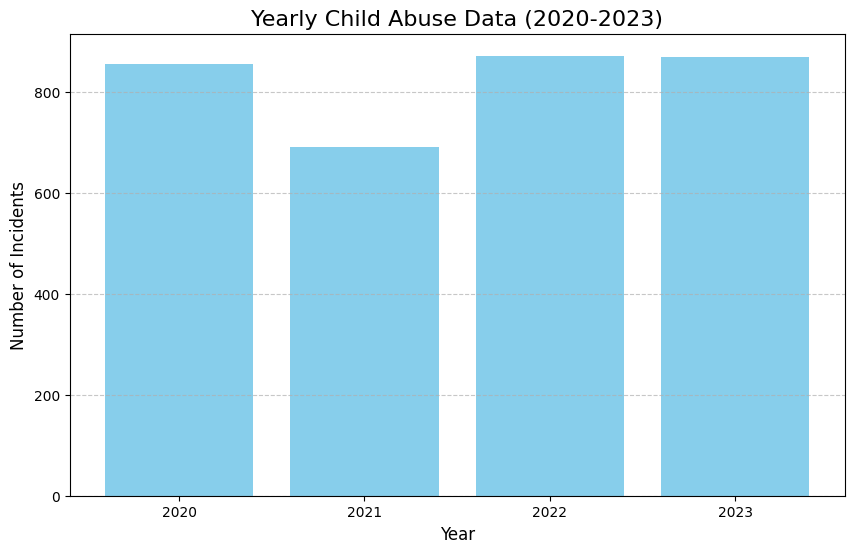

In [28]:
# Convert 'DATETIME OCC' column to datetime format if not already
df_child_abuse_physical['DATETIME OCC'] = pd.to_datetime(df_child_abuse_physical['DATETIME OCC'], errors='coerce')

# Extract the 'Year' from 'DATETIME OCC'
df_child_abuse_physical['Year'] = df_child_abuse_physical['DATETIME OCC'].dt.year

# Filter data for years 2020 to 2023
filtered_years_data = df_child_abuse_physical[df_child_abuse_physical['Year'].between(2020, 2023)]

# Count the number of incidents per year
yearly_counts_till_2023 = filtered_years_data['Year'].value_counts().sort_index()

# Plot the yearly data as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts_till_2023.index, yearly_counts_till_2023.values, color='skyblue')
plt.title('Yearly Child Abuse Data (2020-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(yearly_counts_till_2023.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




The bar chart shows the yearly count of child abuse incidents in Los Angeles from 2020 to 2023. Each bar represents the number of reported cases for a given year, with relatively consistent counts in 2020, 2022, and 2023, and a noticeable dip in 2021.

### Monthly Analysis and Visualization

This section focuses on examining monthly trends in child abuse incidents from 2020 to 2023. By grouping data at the "Year-Month" level, we can identify finer temporal patterns and seasonal variations.

### Key Steps:

1. Extracted the **"Year-Month"** from the `DATETIME OCC` column to group data by months across the specified years.
2. Filtered the dataset for incidents reported between **2020 and 2023**.
3. Counted the number of incidents for each month to understand fluctuations over time.

### Visualization:

- A bar chart displays the number of incidents for each month, with:
  - **x-axis**: Months in "Year-Month" format.
  - **y-axis**: Number of incidents.

### Significance:

Monthly trends provide insights into seasonal or cyclical patterns, aiding in the identification of periods with higher risks of incidents and informing resource allocation strategies.

---

### External Resources:
- Learn more about **monthly grouping in pandas**: [pandas Grouping Documentation](https://pandas.pydata.org/docs/user_guide/groupby.html).
- Explore **time-series visualization**: [Matplotlib for Time-Series Data](https://matplotlib.org/stable/gallery/ticks_and_spines/date_concise_formatter.html).


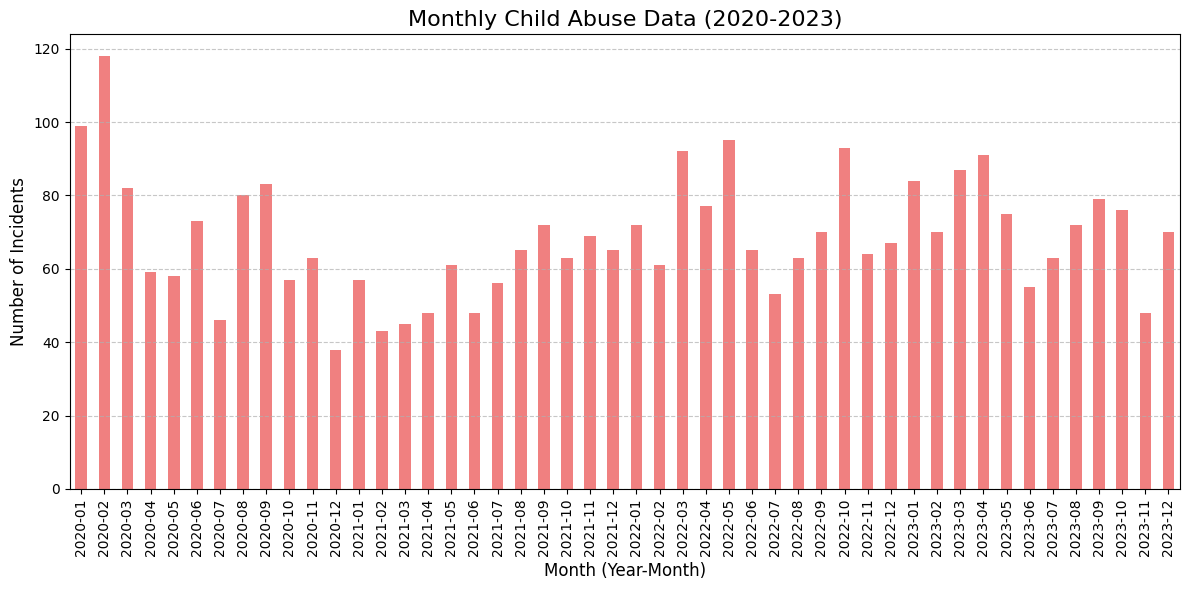

In [29]:
# Ensure 'DATETIME OCC' is in datetime format
df_child_abuse_physical['DATETIME OCC'] = pd.to_datetime(df_child_abuse_physical['DATETIME OCC'], errors='coerce')

# Extract the year and month from the 'DATETIME OCC' column
df_child_abuse_physical['Year-Month'] = df_child_abuse_physical['DATETIME OCC'].dt.to_period('M')

# Filter the data for years 2020 to 2023
filtered_monthly_data = df_child_abuse_physical[df_child_abuse_physical['Year-Month'].dt.year.between(2020, 2023)]

# Count the number of incidents for each month
monthly_counts = filtered_monthly_data['Year-Month'].value_counts().sort_index()

# Plot the monthly data as a bar graph
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='lightcoral')
plt.title('Monthly Child Abuse Data (2020-2023)', fontsize=16)
plt.xlabel('Month (Year-Month)', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart shows the monthly count of child abuse incidents in Los Angeles from 2020 to 2023. It highlights fluctuations in incident reports, with some months experiencing higher counts, particularly early in 2020, and a relatively consistent trend across other periods.

### Monthly Trends Visualization

This section explores monthly trends in child abuse incidents reported in Los Angeles from 2020 to 2023. A line chart is used to visualize the number of incidents per month, highlighting patterns and trends over time.

### Key Steps:

1. Extracted the **"Year-Month"** from the `DATETIME OCC` column to group data by months.
2. Filtered the dataset to include incidents between **2020 and 2023**.
3. Counted the number of incidents for each month to observe temporal variations.

### Visualization:

- A **line chart** was created to display monthly trends:
  - **x-axis**: Months (in "Year-Month" format).
  - **y-axis**: Number of incidents.
  - Data points are marked to emphasize individual months.

### Significance:

- The line chart provides a clear visualization of trends over time, making it easier to spot increases or decreases in incidents.
- Identifying temporal patterns can help policymakers and organizations allocate resources effectively to prevent and address child abuse during high-risk periods.

---

### External Resources:
- Learn about **line plots in Matplotlib**: [Matplotlib Line Chart Documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html).
- Explore **time-series analysis in pandas**: [pandas Time-Series Documentation](https://pandas.pydata.org/docs/user_guide/timeseries.html).


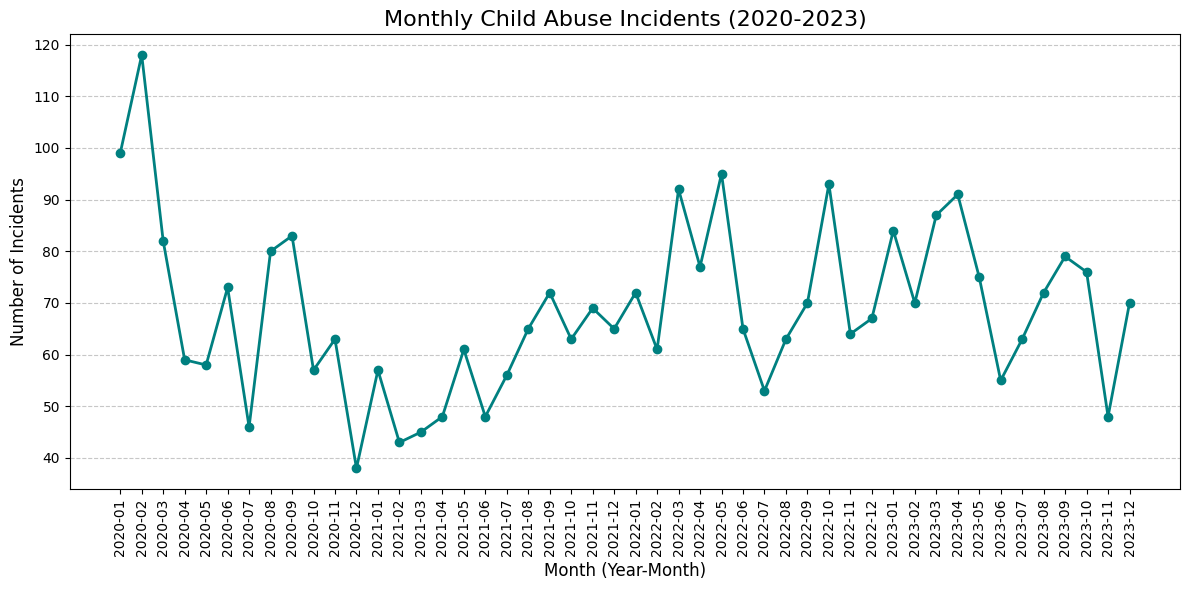

In [30]:
# Ensure 'DATETIME OCC' is in datetime format
df_child_abuse_physical['DATETIME OCC'] = pd.to_datetime(df_child_abuse_physical['DATETIME OCC'], errors='coerce')

# Extract the year and month from the 'DATETIME OCC' column
df_child_abuse_physical['Year-Month'] = df_child_abuse_physical['DATETIME OCC'].dt.to_period('M')

# Filter the data for years 2020 to 2023
filtered_monthly_data = df_child_abuse_physical[df_child_abuse_physical['Year-Month'].dt.year.between(2020, 2023)]

# Count the number of incidents for each month (grouped by Year-Month)
monthly_counts = filtered_monthly_data['Year-Month'].value_counts().sort_index()

# Plot the data as a line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o', color='teal', linestyle='-', linewidth=2, markersize=6)
plt.title('Monthly Child Abuse Incidents (2020-2023)', fontsize=16)
plt.xlabel('Month (Year-Month)', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The line chart shows the monthly trend of child abuse incidents in Los Angeles from 2020 to 2023. Peaks in early 2020 and fluctuations throughout the years indicate variability in reporting or occurrences over time.

### Analysis of Victim Gender Distribution Over the Years

Exploring demographic patterns in child abuse incidents helps uncover important trends related to the sex of the victims. This analysis focuses on yearly trends from 2020 to 2023, comparing incidents involving male and female victims.

### Key Steps:

1. **Datetime Conversion**:
   - Ensured that the **"DATETIME OCC"** column was properly formatted as a datetime object.

2. **Year Extraction and Filtering**:
   - Extracted the year from the **"DATETIME OCC"** column and filtered the dataset to include only incidents between **2020 and 2023**.

3. **Filtering by Victim Sex**:
   - Focused on incidents involving male (`M`) and female (`F`) victims to simplify the analysis.

4. **Grouping and Counting**:
   - Grouped the data by **Year** and **Victim Sex**, then counted the number of incidents for each group.

5. **Visualization**:
   - Created a **bar chart** to display the distribution of incidents by victim sex for each year:
     - **x-axis**: Years (2020 to 2023).
     - **y-axis**: Number of incidents.
     - **Colors**: Distinct colors represent male and female victims, enhancing interpretability.

---

### Insights from the Visualization:

- The bar chart clearly shows the number of incidents involving male and female victims for each year.
- Variations in the number of incidents across years and between sexes provide valuable information for targeted interventions.

### Significance:

- Analyzing the data by victim sex helps identify gender-specific trends and disparities.
- Insights from this analysis can guide resource allocation and the development of focused support programs for affected demographics.

---

### External Resources:
- Learn about **bar plots in seaborn**: [Seaborn Bar Plot Documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html).
- For further exploration of **grouping and aggregating data in pandas**, visit: [pandas GroupBy Documentation](https://pandas.pydata.org/docs/user_guide/groupby.html).


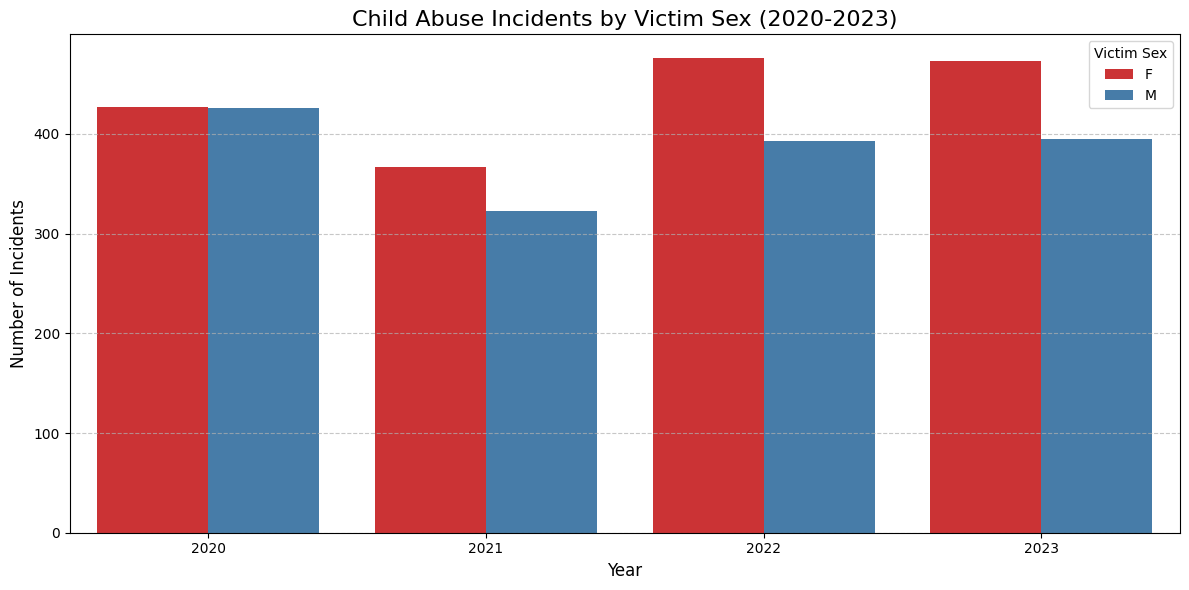

In [31]:
# Ensure 'DATETIME OCC' is in datetime format
df_child_abuse_physical['DATETIME OCC'] = pd.to_datetime(df_child_abuse_physical['DATETIME OCC'], errors='coerce')

# Extract the year from the 'DATETIME OCC' column
df_child_abuse_physical['Year'] = df_child_abuse_physical['DATETIME OCC'].dt.year

# Filter data for years 2020 to 2023
filtered_data_sex = df_child_abuse_physical[df_child_abuse_physical['Year'].between(2020, 2023)]

# Filter for only Male ('M') and Female ('F') victims
filtered_data_sex = filtered_data_sex[filtered_data_sex['Vict Sex'].isin(['M', 'F'])]

# Group the data by year and victim sex, then count incidents
sex_yearly_counts = filtered_data_sex.groupby(['Year', 'Vict Sex']).size().reset_index(name='Incidents')

# Plot the data using seaborn to ensure distinct colors for each sex
plt.figure(figsize=(12, 6))
sns.barplot(data=sex_yearly_counts, x='Year', y='Incidents', hue='Vict Sex', palette='Set1')

# Add labels and title
plt.title('Child Abuse Incidents by Victim Sex (2020-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Victim Sex', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


The bar chart compares the yearly count of child abuse incidents by victim gender (male and female) from 2020 to 2023. Female victims consistently have slightly higher incident counts than male victims across all years, with a noticeable drop in cases for both genders in 2021.

### Victim Gender Distribution: Male vs Female

Understanding the overall distribution of child abuse incidents by gender is crucial for identifying demographic patterns. This section focuses on the proportion of incidents involving male and female victims.

### Key Steps:

1. **Counting Incidents by Victim Sex**:
   - Counted the total number of incidents for each victim sex (`M` for male and `F` for female).
   - Filtered the data to include only male and female victims, excluding any other or missing categories.

2. **Visualization**:
   - Created a **pie chart** to represent the percentage distribution of incidents by victim sex.
   - The chart uses distinct colors for male (light blue) and female (light coral) victims for clarity.

---

### Insights from the Visualization:

- The pie chart provides a clear visual representation of the proportion of child abuse incidents involving male and female victims.
- This high-level overview helps in understanding the demographic distribution of the dataset.

---

### Significance:

- This analysis highlights gender disparities in child abuse incidents, providing context for more detailed investigations.
- The proportional distribution informs stakeholders about the demographics of affected individuals, aiding targeted interventions.

---

### External Resources:
- Learn more about **creating pie charts in Matplotlib**: [Matplotlib Pie Chart Documentation](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html).


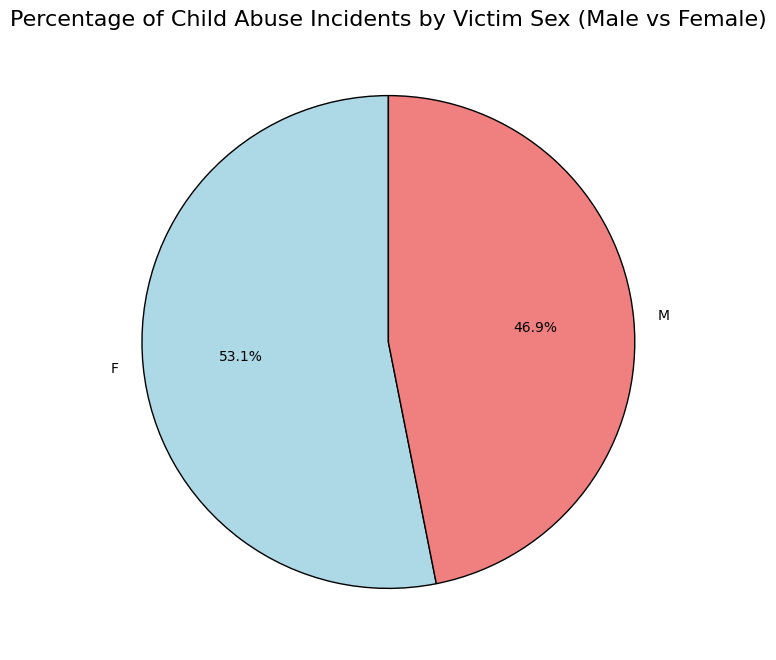

In [32]:
# Count the number of incidents for each victim sex (male and female)
sex_counts = df_child_abuse_physical['Vict Sex'].value_counts()

# Filter for only male and female data
sex_counts = sex_counts[sex_counts.index.isin(['M', 'F'])]

# Plot a pie chart for the sex distribution
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Percentage of Child Abuse Incidents by Victim Sex (Male vs Female)', fontsize=16)

# Show the plot
plt.show()


The pie chart displays the percentage distribution of child abuse incidents by victim gender. Female victims account for 53.1% of the incidents, while male victims make up 46.9%, showing a relatively balanced gender distribution with a slight predominance of female victims.

### Year-wise Distribution of Victim Age (Male & Female, Under 18)

Analyzing the age distribution of victims across different years provides insights into the demographics of affected individuals. This section focuses on creating a violin plot to visualize the age distribution of child abuse victims under 18 years of age for both male and female genders, from 2020 to 2023.

---

### Key Steps:

1. **Datetime Conversion**:
   - Ensured that the **"DATETIME OCC"** column was in the correct datetime format to allow accurate extraction of the year.

2. **Year and Demographic Filtering**:
   - Extracted the year from the **"DATETIME OCC"** column and filtered the data for incidents occurring between **2020 and 2023**.
   - Further filtered the data to include:
     - Victims under the age of 18.
     - Only male (`M`) and female (`F`) victims.

3. **Visualization**:
   - Created a **violin plot** to depict the distribution of victim age for each year:
     - **x-axis**: Years (2020 to 2023).
     - **y-axis**: Age of the victims.
     - The violin plot illustrates the density and range of victim ages for each year.

---

### Insights from the Visualization:

- The violin plot provides a comprehensive view of the age distribution for victims under 18, highlighting:
  - The range of victim ages.
  - Density patterns for each year.
- This can help identify potential shifts or trends in the demographics of child abuse victims over the analyzed period.

---

### Significance:

- Understanding age distribution enables targeted interventions for specific age groups.
- Year-wise analysis helps in tracking changes in demographic patterns, which could be influenced by societal or environmental factors.

---

### External Resources:
- Learn more about **violin plots in Seaborn**: [Seaborn Violin Plot Documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html).
- Explore **grid styling and customization in Matplotlib**: [Matplotlib Grid Documentation](https://matplotlib.org/stable/gallery/ticks_and_spines/grid.html).


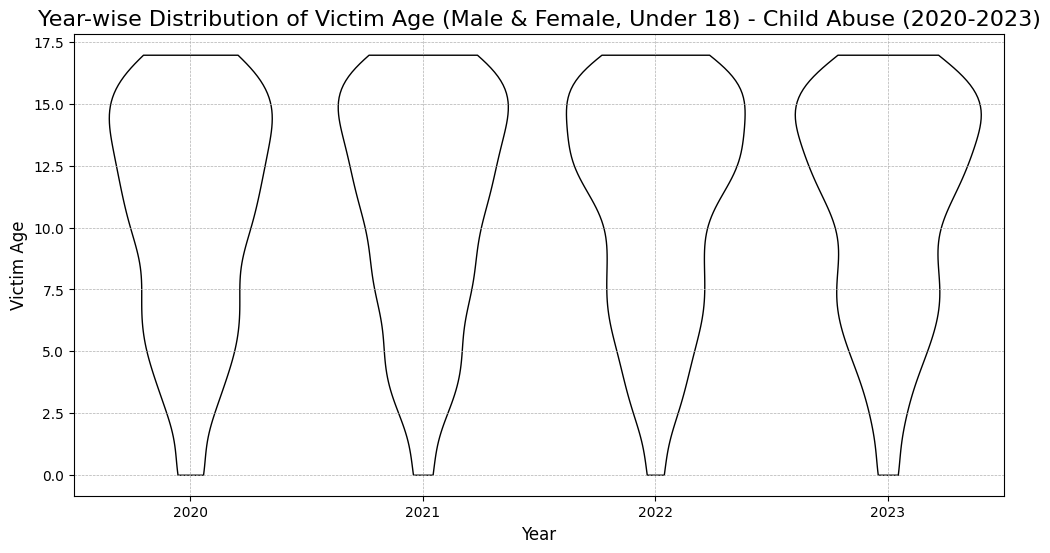

In [33]:
# Ensure 'DATETIME OCC' is in datetime format
df_child_abuse_physical['DATETIME OCC'] = pd.to_datetime(df_child_abuse_physical['DATETIME OCC'], errors='coerce')

# Extract the year from the 'DATETIME OCC' column
df_child_abuse_physical['Year'] = df_child_abuse_physical['DATETIME OCC'].dt.year

# Filter data for years 2020 to 2023
filtered_data_year = df_child_abuse_physical[df_child_abuse_physical['Year'].between(2020, 2023)]

# Further filter the data to include only victims under 18 and male/female victims
filtered_data_year = filtered_data_year[filtered_data_year['Vict Age'] < 18]
filtered_data_year = filtered_data_year[filtered_data_year['Vict Sex'].isin(['M', 'F'])]

# Create the violin plot with year-wise distribution of victim age
plt.figure(figsize=(12, 6))
sns.violinplot(x='Year', y='Vict Age', data=filtered_data_year, inner=None, color="white", linewidth=1, edgecolor="black", cut=0)

# Add title and labels
plt.title("Year-wise Distribution of Victim Age (Male & Female, Under 18) - Child Abuse (2020-2023)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Victim Age", fontsize=12)

# Enable grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


The violin plot visualizes the yearly distribution of victim ages for child abuse incidents involving male and female victims under 18 from 2020 to 2023. The plot shows the density and range of victim ages for each year, with consistent patterns across all four years.

### Distribution of Victim Age by Victim Sex (Under 18)

This analysis explores the distribution of victim ages for child abuse cases involving male and female victims under the age of 18, reported between 2020 and 2023. A violin plot is used to visualize and compare the age distributions by gender.

---

### Key Steps:

1. **Datetime Conversion**:
   - Ensured that the **"DATETIME OCC"** column was properly formatted as a datetime object for accurate year extraction.

2. **Year and Demographic Filtering**:
   - Filtered the data for incidents occurring between **2020 and 2023**.
   - Focused only on male (`M`) and female (`F`) victims under the age of 18.

3. **Visualization**:
   - Created a **violin plot** to represent the distribution of victim ages by victim sex:
     - **x-axis**: Victim sex (Male or Female).
     - **y-axis**: Age of the victims.
     - The violin plot displays the density and range of victim ages for each sex.

---

### Insights from the Visualization:

- The violin plot illustrates the differences in age distribution between male and female victims.
- Observing density patterns can reveal which age groups are most affected for each gender, providing deeper insights into demographic vulnerabilities.

---

### Significance:

- Comparing age distributions by gender helps in identifying gender-specific trends in child abuse cases.
- This information is critical for tailoring support programs and preventive measures to address the needs of specific victim groups.

---

### External Resources:
- Learn more about **violin plots in Seaborn**: [Seaborn Violin Plot Documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html).
- Explore how to use **filters and conditions in pandas**: [pandas Filtering Documentation](https://pandas.pydata.org/docs/user_guide/indexing.html).


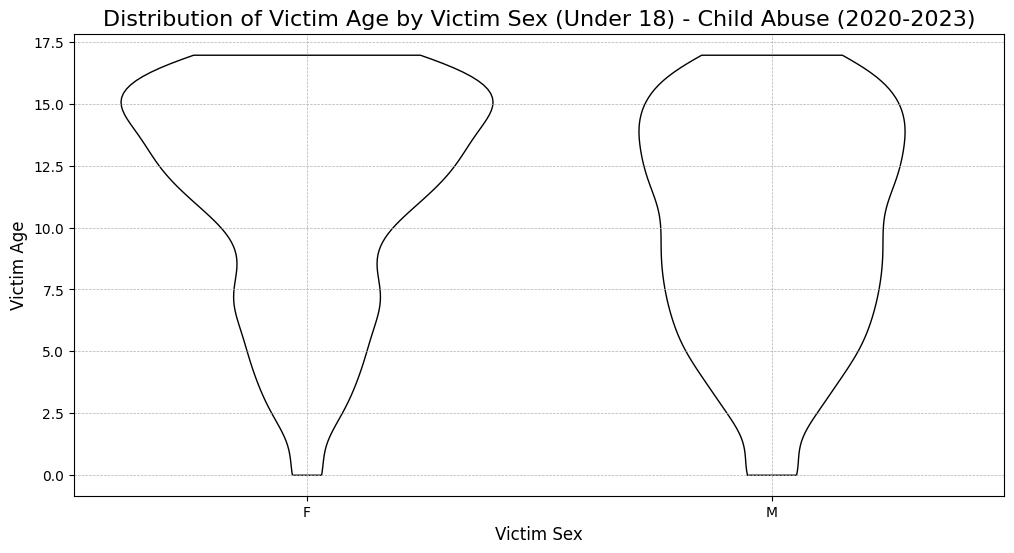

In [34]:
# Ensure 'DATETIME OCC' is in datetime format
df_child_abuse_physical['DATETIME OCC'] = pd.to_datetime(df_child_abuse_physical['DATETIME OCC'], errors='coerce')

# Extract the year from the 'DATETIME OCC' column
df_child_abuse_physical['Year'] = df_child_abuse_physical['DATETIME OCC'].dt.year

# Filter data for years 2020 to 2023
filtered_data_sex = df_child_abuse_physical[df_child_abuse_physical['Year'].between(2020, 2023)]

# Filter for only Male ('M') and Female ('F') victims
filtered_data_sex = filtered_data_sex[filtered_data_sex['Vict Sex'].isin(['M', 'F'])]

# Further filter the data to include only victims under 18 (child abuse cases)
filtered_data_sex = filtered_data_sex[filtered_data_sex['Vict Age'] < 18]

# Create the violin plot with adjusted styles
plt.figure(figsize=(12, 6))
sns.violinplot(x='Vict Sex', y='Vict Age', data=filtered_data_sex, inner=None, color="white", linewidth=1, edgecolor="black", cut=0)

# Add title and labels
plt.title("Distribution of Victim Age by Victim Sex (Under 18) - Child Abuse (2020-2023)", fontsize=16)
plt.xlabel("Victim Sex", fontsize=12)
plt.ylabel("Victim Age", fontsize=12)

# Enable grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


The violin plot displays the distribution of victim ages for male and female victims under 18 in child abuse cases from 2020 to 2023. Both distributions show similar shapes, indicating a comparable spread of ages between genders, with most victims clustered around the middle age range.

### Geospatial Visualization of Child Abuse Incidents in Los Angeles (2020-2023)

Mapping the locations of child abuse incidents helps in understanding their geographical distribution, highlighting areas with higher concentrations of reported cases. This section uses **Folium**, a Python library for interactive maps, to visualize incidents involving victims under the age of 18 in Los Angeles from 2020 to 2023.

---

### Key Steps:

1. **Data Filtering**:
   - Filtered the dataset to include only incidents reported between **2020 and 2023**, involving victims under the age of 18.
   - Ensured that only records with valid latitude (`LAT`) and longitude (`LON`) coordinates were used for mapping.

2. **Map Creation**:
   - Created a map centered around Los Angeles using approximate coordinates (`34.0522, -118.2437`) with an initial zoom level of 12.

3. **Dynamic Marker Assignment**:
   - Added markers for each incident based on its geographical coordinates:
     - **Blue** markers represent male victims.
     - **Red** markers represent female victims.
     - **Gray** markers represent unknown or other victim sexes.
   - Each marker includes a popup with details such as:
     - Crime description.
     - Victim age.
     - Victim sex.

4. **Export and Display**:
   - Saved the map to an HTML file for sharing or offline viewing.
   - Displayed the map interactively within the Jupyter Notebook.

---

### Insights from the Map:

- The map visually highlights the geographical spread of incidents across Los Angeles.
- Clusters of markers may indicate areas with higher frequencies of child abuse cases, which can inform resource allocation and policy decisions.

---

### Significance:

- Geospatial analysis provides valuable insights into where incidents are most concentrated, enabling targeted interventions.
- Interactive maps allow stakeholders to explore data dynamically, enhancing usability and engagement.

---

### External Resources:
- Learn about **Folium for geospatial visualization**: [Folium Documentation](https://python-visualization.github.io/folium/).
- Explore **geospatial data handling in Python**: [Geospatial Analysis with Python](https://geopandas.org/).


In [35]:
# Filter data for years 2020 to 2023 and victims under 18
filtered_data = df_child_abuse_physical[
    (df_child_abuse_physical['Year'].between(2020, 2023)) & 
    (df_child_abuse_physical['Vict Age'] < 18)
]

# Create a map centered around Los Angeles (approx. coordinates)
map_center = [34.0522, -118.2437]  # Latitude and Longitude for Los Angeles
mymap = folium.Map(location=map_center, zoom_start=12)

# Iterate over the rows and add a marker for each crime
for index, row in filtered_data.iterrows():
    if pd.notnull(row['LAT']) and pd.notnull(row['LON']):  # Check if coordinates exist
        # Assign color based on Victim Sex
        if row['Vict Sex'] == 'M':  # Male victims
            color = 'blue'
        elif row['Vict Sex'] == 'F':  # Female victims
            color = 'red'
        else:  # Other or unknown
            color = 'gray'

        # Add a marker for each crime
        folium.CircleMarker(
            location=[row['LAT'], row['LON']],
            radius=5,
            color=color,  # Dynamic color based on victim sex
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Crime: {row['Crm Cd Desc']}<br>Victim Age: {row['Vict Age']}<br>Victim Sex: {row['Vict Sex']}"
        ).add_to(mymap)

# Save the map to an HTML file
mymap.save('child_abuse_crime_map.html')

# Display the map (if running in a Jupyter notebook)
mymap

The map displays the geographical distribution of child abuse incidents involving victims under 18 in Los Angeles (2020–2023). Red markers represent female victims, while blue markers represent male victims. The incidents are concentrated in urban areas, providing a clear visual of the regions with higher reporting or occurrences of child abuse.

## Model: Analysis, Hypothesis Testing, and Machine Learning

This section uses linear regression to analyze the relationship between the year of occurrence and the age of victims, categorized by gender (male and female victims under the age of 18). By fitting regression models for each gender, we aim to uncover temporal trends in victim demographics.

---

### Key Steps:

1. **Data Preparation**:
   - Filtered the dataset to include only male and female victims under the age of 18.
   - Offset the years slightly for better separation in the visualization:
     - Male data points shifted slightly left.
     - Female data points shifted slightly right.

2. **Linear Regression Models**:
   - **Male Victims**:
     - Fit a linear regression model using **Year** as the predictor variable and **Victim Age** as the response variable.
   - **Female Victims**:
     - Similarly, fit a linear regression model for female victims.

3. **Visualization**:
   - Created a scatter plot to display the age of victims over time:
     - **Blue points** represent male victims.
     - **Red points** represent female victims.
   - Added regression lines for each gender to highlight the trend over time.

---

### Insights from the Visualization:

- The scatter plot and regression lines illustrate how the average age of victims has changed over time for male and female victims.
- Comparing regression slopes for each gender can reveal whether the trends differ significantly.

---

### Significance:

- Temporal trends in victim demographics are crucial for understanding changes in child abuse patterns.
- This analysis helps identify whether interventions or external factors influence the age distribution over time.

---

### External Resources:
- Learn about **linear regression in Scikit-learn**: [Scikit-learn Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
- Explore **scatter plots and regression lines in Matplotlib**: [Matplotlib Plot Documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html).


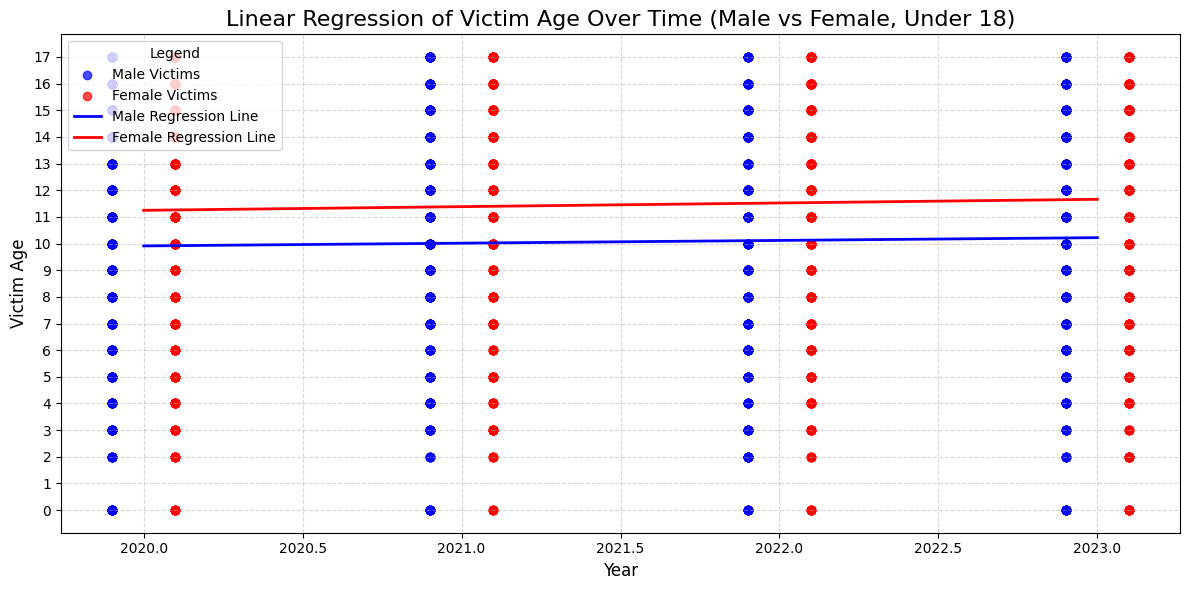

In [43]:
# Create copies of the filtered data
male_data = filtered_data[filtered_data['Vict Sex'] == 'M'].copy()
female_data = filtered_data[filtered_data['Vict Sex'] == 'F'].copy()

# Offset years slightly for better separation
male_data['Year Offset'] = male_data['Year'] - 0.1  # Shift male points slightly left
female_data['Year Offset'] = female_data['Year'] + 0.1  # Shift female points slightly right

# Fit linear regression for males
male_model = LinearRegression()
male_X = male_data[['Year']]
male_y = male_data['Vict Age']
male_model.fit(male_X, male_y)
male_pred = male_model.predict(male_X)

# Fit linear regression for females
female_model = LinearRegression()
female_X = female_data[['Year']]
female_y = female_data['Vict Age']
female_model.fit(female_X, female_y)
female_pred = female_model.predict(female_X)

# Plot the data and regression lines
plt.figure(figsize=(12, 6))

# Scatter plot for males
plt.scatter(male_data['Year Offset'], male_data['Vict Age'], color='blue', alpha=0.7, label='Male Victims')

# Scatter plot for females
plt.scatter(female_data['Year Offset'], female_data['Vict Age'], color='red', alpha=0.7, label='Female Victims')

# Regression line for males
plt.plot(male_data['Year'], male_pred, color='blue', linewidth=2, label='Male Regression Line')

# Regression line for females
plt.plot(female_data['Year'], female_pred, color='red', linewidth=2, label='Female Regression Line')

# Customize the plot
plt.title('Linear Regression of Victim Age Over Time (Male vs Female, Under 18)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Victim Age', fontsize=12)

# Set y-axis ticks to integers
min_age = int(filtered_data['Vict Age'].min())
max_age = int(filtered_data['Vict Age'].max())
plt.yticks(range(min_age, max_age + 1))

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Legend', loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


The scatter plot and regression lines illustrate the relationship between victim age and the year of the incident for male and female victims under 18. The blue regression line represents male victims, while the red regression line represents female victims. Both lines are nearly flat, indicating minimal change in average victim age over time for either gender.

### Descriptive Statistics and Gender-wise Trends

In this section, we calculate and visualize descriptive statistics for child abuse incidents, focusing on the yearly trends in the number of male and female victims. This helps in identifying demographic patterns and variations over time.

---

### Key Steps:

1. **Descriptive Statistics Calculation**:
   - Grouped the data by **Year** and **Victim Sex** to compute:
     - **Average Age**: The mean age of victims.
     - **Median Age**: The median age of victims.
     - **Count**: The total number of victims.

2. **Separate Analysis by Gender**:
   - Extracted separate summaries for male (`M`) and female (`F`) victims to facilitate gender-wise comparison.

3. **Visualization**:
   - Created a **line plot** to display the number of victims over time:
     - **Blue line** represents male victims.
     - **Red line** represents female victims.
   - Clearly labeled axes and a grid enhance readability.

---

### Insights from the Visualization:

- The line plot shows trends in the number of male and female victims across the years 2020 to 2023.
- Variations in the number of victims by gender can highlight shifts in reporting patterns, underlying causes, or the impact of interventions.

---

### Significance:

- Yearly gender-wise trends provide critical insights into how child abuse incidents affect different demographics.
- This analysis can guide policymakers in developing targeted strategies to address gender-specific challenges.

---

### External Resources:
- Learn about **aggregations and groupby in pandas**: [pandas GroupBy Documentation](https://pandas.pydata.org/docs/user_guide/groupby.html).
- Explore **line plots in Seaborn**: [Seaborn Line Plot Documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

In the next steps, we will explore more advanced modeling and hypothesis testing based on these trends.


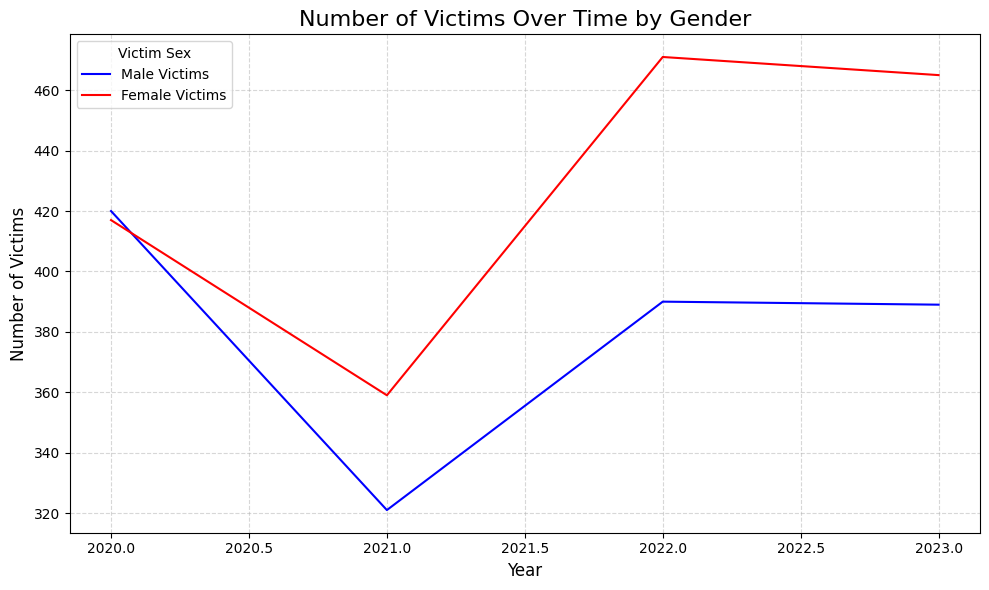

In [44]:
# Calculate descriptive statistics
summary = filtered_data.groupby(['Year', 'Vict Sex']).agg(
    Avg_Age=('Vict Age', 'mean'),
    Median_Age=('Vict Age', 'median'),
    Count=('Vict Age', 'count')
).reset_index()

# Calculate descriptive statistics for male and female separately
male_summary = summary[summary['Vict Sex'] == 'M']
female_summary = summary[summary['Vict Sex'] == 'F']

# Plot line plots for males and females
plt.figure(figsize=(10, 6))

# Male data
sns.lineplot(data=male_summary, x='Year', y='Count', label='Male Victims', color='blue')

# Female data
sns.lineplot(data=female_summary, x='Year', y='Count', label='Female Victims', color='red')

# Customize the plot
plt.title('Number of Victims Over Time by Gender', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Victims', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Victim Sex')
plt.tight_layout()

# Show the plot
plt.show()



The line chart illustrates the number of male and female victims of child abuse incidents over time from 2020 to 2023. Female victim counts (red line) are consistently higher than male victim counts (blue line) across the years, with both genders showing a dip in 2021 followed by a recovery in subsequent years.

### Hypothesis Testing: Comparing Ages by Gender

To determine whether there is a significant difference in the average ages of male and female victims, we perform a two-sample **t-test**. This statistical test compares the means of two independent groups (male and female victims) to assess whether the observed differences are statistically significant.

---

### Key Steps:

1. **Data Selection**:
   - Extracted the ages of male victims (`M`) and female victims (`F`) from the filtered dataset.

2. **Two-Sample t-Test**:
   - Performed a **t-test** to compare the average ages of the two groups:
     - **Null Hypothesis (H₀)**: There is no significant difference in the average ages of male and female victims.
     - **Alternative Hypothesis (H₁)**: There is a significant difference in the average ages of male and female victims.

3. **Interpretation of Results**:
   - **t-Statistic**: Indicates the magnitude of the difference between the groups relative to the variation within the groups.
   - **p-Value**: Measures the probability of observing the data if the null hypothesis is true:
     - A p-value < 0.05 indicates a statistically significant difference.

---

### Insights from the Test:

- If the p-value is below the threshold (0.05), we conclude that there is a significant difference in the average ages of male and female victims.
- Otherwise, we fail to reject the null hypothesis, suggesting no significant difference.

---

### Significance:

- Understanding age differences between male and female victims can inform gender-specific policies and interventions.
- Hypothesis testing provides a rigorous statistical framework for comparing demographic variables.

---

### External Resources:
- Learn more about **t-tests in SciPy**: [SciPy t-test Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).
- Explore the concepts of **hypothesis testing**: [Hypothesis Testing Overview](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/).

This statistical test lays the foundation for deeper analysis of demographic factors influencing child abuse incidents.


In [45]:
male_ages = filtered_data[filtered_data['Vict Sex'] == 'M']['Vict Age']
female_ages = filtered_data[filtered_data['Vict Sex'] == 'F']['Vict Age']

t_stat, p_val = ttest_ind(male_ages, female_ages)

print(f"T-Statistic: {t_stat}, P-Value: {p_val}")
if p_val < 0.05:
    print("Significant difference in average ages between male and female victims.")
else:
    print("No significant difference in average ages.")


T-Statistic: -8.896874050719962, P-Value: 9.368738598309197e-19
Significant difference in average ages between male and female victims.


The T-test was conducted to determine if there is a significant difference in the average ages of male and female victims of child abuse. The results are as follows:

- **T-Statistic**: -8.90  
- **P-Value**: 9.37 × 10⁻¹⁹  

Since the P-value is far below the significance threshold of 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in the average ages of male and female victims. This indicates that the age distributions for male and female victims differ substantially.


### Hypothesis Testing: Analyzing Age Trends Over Time

To investigate whether there is a significant trend in the ages of victims across different years, we perform a one-way **ANOVA (Analysis of Variance)** test. This test compares the means of victim ages across multiple years to assess whether the observed differences are statistically significant.

---

### Key Steps:

1. **Data Preparation**:
   - Extracted the unique years from the dataset.
   - Grouped the victim ages by year to create a list of age groups corresponding to each year.

2. **One-Way ANOVA Test**:
   - Performed an **ANOVA test** to compare the means of victim ages across the years:
     - **Null Hypothesis (H₀)**: There is no significant difference in the mean ages of victims across years.
     - **Alternative Hypothesis (H₁)**: There is a significant difference in the mean ages of victims across years.

3. **Interpretation of Results**:
   - **F-Statistic**: Measures the ratio of variation between the group means to the variation within the groups.
   - **p-Value**: Indicates the probability of observing the data if the null hypothesis is true:
     - A p-value < 0.05 suggests a statistically significant age trend over time.

---

### Insights from the Test:

- If the p-value is below the threshold (0.05), it indicates a significant change in the ages of victims over the analyzed years.
- Otherwise, it suggests that the average ages of victims have remained consistent across the years.

---

### Significance:

- Identifying age trends over time is crucial for understanding how child abuse patterns evolve.
- Significant findings may point to external factors, societal changes, or policy impacts influencing victim demographics.

---

### External Resources:
- Learn more about **ANOVA tests in SciPy**: [SciPy ANOVA Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).
- Understand the concepts of **Analysis of Variance (ANOVA)**: [ANOVA Overview](https://www.statisticshowto.com/probability-and-statistics/anova/).

This analysis provides statistical evidence for understanding temporal trends in victim age distribution.


In [46]:
years = filtered_data['Year'].unique()
age_groups = [filtered_data[filtered_data['Year'] == year]['Vict Age'] for year in years]

f_stat, p_val = f_oneway(*age_groups)

print(f"F-Statistic: {f_stat}, P-Value: {p_val}")
if p_val < 0.05:
    print("Significant age trend over time.")
else:
    print("No significant age trend over time.")


F-Statistic: 1.8226381047157993, P-Value: 0.14079957873073476
No significant age trend over time.


An ANOVA test was conducted to assess if there is a significant trend in victim ages across different years. The results are as follows:

- **F-Statistic**: 1.82  
- **P-Value**: 0.141  

Since the P-value is greater than the significance threshold of 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant trend in victim ages over time for the years included in the dataset.


### Regression Analysis on Victim Age by Gender

This section focuses on building a linear regression model to understand the relationship between victim age and gender. By encoding gender as a binary variable and predicting victim age, we quantify the impact of gender on the age distribution of victims.

---

### Key Steps:

1. **Data Filtering**:
   - Filtered the dataset to include only male (`M`) and female (`F`) victims, excluding any other categories.

2. **One-Hot Encoding**:
   - Used one-hot encoding for the **'Vict Sex'** column:
     - Male (`M`) was encoded as `1`.
     - Female (`F`) was the reference category, represented as `0`.

3. **Data Splitting**:
   - Split the dataset into training and testing sets:
     - 70% for training the model.
     - 30% for testing the model's performance.

4. **Model Training**:
   - Trained a linear regression model using gender as the predictor variable (`Vict Sex_M`) and victim age as the response variable.

5. **Model Evaluation**:
   - Evaluated the model using:
     - **R² Score**: Measures how well the predictor variable explains the variance in the response variable.
     - **Mean Squared Error (MSE)**: Quantifies the average error between the predicted and actual ages.

6. **Interpreting Coefficients**:
   - Extracted the model coefficients to interpret the effect of gender (`Vict Sex_M`) on victim age:
     - The **Intercept** represents the average age of female victims (reference category).
     - The **Coefficient** for `Vict Sex_M` indicates the average age difference between male and female victims.

---

### Results:

- **Intercept**: Represents the average age of female victims (reference group).
- **Coefficient**: Indicates the average age difference for male victims compared to female victims.
- **R² Score**: Reflects how well the model explains the variance in victim age.
- **Mean Squared Error**: Shows the average prediction error in years.

---

### Significance:

- Regression analysis provides a quantitative understanding of the relationship between gender and victim age.
- The results help identify whether gender significantly impacts the age distribution of child abuse victims.

---

### External Resources:
- Learn more about **linear regression in Scikit-learn**: [Scikit-learn Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
- Explore **metrics for evaluating regression models**: [Scikit-learn Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

This analysis lays the groundwork for understanding demographic factors influencing victim age in child abuse cases.


In [47]:
# Filter data to include only male ('M') and female ('F') victims
filtered_data = filtered_data[filtered_data['Vict Sex'].isin(['M', 'F'])]

# Prepare data: One-hot encode 'Vict Sex' (drop 'F' as the reference category)
X = pd.get_dummies(filtered_data[['Vict Sex']], drop_first=True)
y = filtered_data['Vict Age']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Format coefficients as standard Python floats
coefficients = {feature: float(coeff) for feature, coeff in zip(X.columns, model.coef_)}

# Display results
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients: {coefficients}")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


Intercept: 11.5639
Coefficients: {'Vict Sex_M': -1.413271541145068}
R^2 Score: 0.0164
Mean Squared Error: 21.3403


#### Linear Regression Analysis on Victim Age and Gender

A linear regression model was trained to predict the age of victims based on their gender. The dataset was limited to male (`M`) and female (`F`) victims, and one-hot encoding was applied to represent gender, with `F` as the reference category.

#### Model Output:
- **Intercept**: 11.5639  
  This represents the average predicted victim age for females.
- **Coefficient (Vict Sex_M)**: -1.4133  
  This indicates that the predicted victim age for males is, on average, 1.413 years lower than that of females.
- **R² Score**: 0.0164  
  This suggests that only 1.64% of the variation in victim age can be explained by the model.
- **Mean Squared Error (MSE)**: 21.3403  
  This reflects the average squared difference between the predicted and actual victim ages.

#### Insights:
The low R² score indicates that gender alone is not a strong predictor of victim age, suggesting other factors should be considered to improve the model's explanatory power.


### Visualization of Regression Model for Victim Age by Gender

This section visualizes the results of the regression model, showing the relationship between victim age and gender, and the corresponding regression line.

---

### Key Steps:

1. **Prediction Data**:
   - Created a DataFrame to represent the predicted victim ages for female (`Vict Sex_M = 0`) and male (`Vict Sex_M = 1`) victims based on the regression model:
     - **Intercept**: Represents the average predicted age for female victims.
     - **Intercept + Coefficient**: Represents the average predicted age for male victims.

2. **Scatter Plot**:
   - Plotted the actual victim age data points, with:
     - **x-axis**: Encoded gender values (`0` for female and `1` for male).
     - **y-axis**: Actual victim ages.
     - Gray dots represent the actual data points.

3. **Regression Line**:
   - Added a regression line to connect the predicted values for male and female victims:
     - Red line shows the relationship between victim age and gender as predicted by the regression model.

---

### Insights from the Visualization:

- The scatter plot displays the variability of actual victim ages for male and female victims.
- The regression line provides a clear representation of the average age difference between genders as predicted by the model.
- This visualization highlights how gender influences victim age on average, while also showing the spread of individual data points.

---

### Significance:

- The regression line summarizes the relationship between victim age and gender, aiding in demographic comparisons.
- Visualizing the model results helps validate the regression analysis and ensures interpretability.

---

### External Resources:
- Learn more about **visualizing regression models in Matplotlib**: [Matplotlib Regression Line Guide](https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html).
- Explore **scatter plots in Matplotlib**: [Matplotlib Scatter Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

This visualization complements the regression analysis by providing an intuitive understanding of the model's predictions and the underlying data distribution.


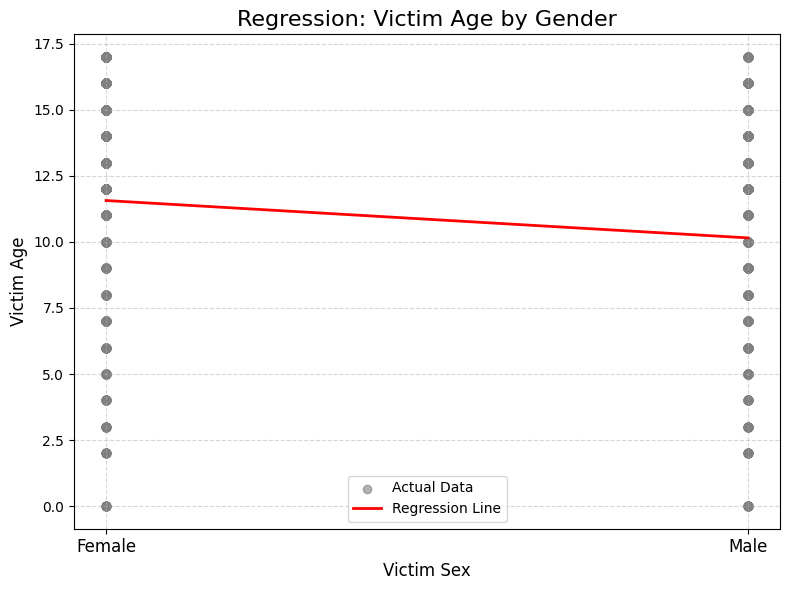

In [48]:
# Create a DataFrame for predictions (male and female)
regression_data = pd.DataFrame({
    'Vict Sex_M': [0, 1],  # Female (0), Male (1)
    'Predicted Vict Age': [model.intercept_, model.intercept_ + model.coef_[0]]
})

# Scatter plot for actual data points
plt.figure(figsize=(8, 6))
plt.scatter(
    X['Vict Sex_M'], y,
    alpha=0.6, color='gray', label='Actual Data'
)

# Regression line (predicted values)
plt.plot(
    regression_data['Vict Sex_M'], regression_data['Predicted Vict Age'],
    color='red', label='Regression Line', linewidth=2
)

# Customize the plot
plt.title('Regression: Victim Age by Gender', fontsize=16)
plt.xticks([0, 1], ['Female', 'Male'], fontsize=12)  # Label categories
plt.xlabel('Victim Sex', fontsize=12)
plt.ylabel('Victim Age', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


#### Regression: Victim Age by Gender

This plot visualizes the results of a regression analysis conducted to predict victim age based on gender. 

- **Gray dots**: Represent the actual ages of victims, categorized by gender.
- **Red line**: Represents the regression line, predicting the average victim age based on gender.

From the regression model:
- **Female victims** have a slightly higher predicted average age (approximately **11.56 years**).
- **Male victims** are predicted to be younger by approximately **1.41 years**, as indicated by the negative coefficient for the male category.

The regression line demonstrates this relationship. However, the low R² score (0.0164) suggests that gender alone is not a strong predictor of victim age.


### Classification Model with SMOTE and Hyperparameter Tuning

In this section, we build a classification model to predict the gender of child abuse victims (male or female) based on the year of the incident and the victim's age. The model leverages **SMOTE (Synthetic Minority Oversampling Technique)** to address class imbalance and uses a **Random Forest Classifier** optimized with **GridSearchCV** for hyperparameter tuning.

---

### Key Steps:

1. **Data Preparation**:
   - Filtered the dataset to include only male (`M`) and female (`F`) victims.
   - Encoded the target variable (`Vict Sex`) as a binary variable:
     - Male = `1`
     - Female = `0`
   - Used **Year** and **Victim Age** as predictor variables.

2. **Handling Class Imbalance**:
   - Applied **SMOTE** to balance the dataset by oversampling the minority class (if applicable), ensuring the model learns effectively without bias.

3. **Data Splitting**:
   - Split the balanced dataset into training (70%) and testing (30%) sets for model evaluation.

4. **Hyperparameter Tuning**:
   - Used **GridSearchCV** to optimize the Random Forest Classifier by exploring a grid of hyperparameters, including:
     - Number of estimators (`n_estimators`): Number of decision trees in the forest.
     - Maximum tree depth (`max_depth`): Maximum depth of each tree.
     - Minimum samples required to split (`min_samples_split`).
     - Minimum samples per leaf (`min_samples_leaf`).
   - Performed 5-fold cross-validation to select the best combination of parameters.

5. **Model Evaluation**:
   - Evaluated the optimized model on the testing set using:
     - **Accuracy Score**: Measures the percentage of correct predictions.
     - **Classification Report**: Provides precision, recall, and F1-score for each class.
     - **Feature Importances**: Highlights the relative importance of features (Year and Victim Age) in predicting the victim's gender.

6. **Visualization**:
   - Created a bar chart to display feature importances, providing insights into which predictors influence the model's decisions.

---

### Results:

- **Best Parameters**: Displays the optimal hyperparameters identified by GridSearchCV.
- **Accuracy**: Reflects the model's performance on the testing set.
- **Classification Report**: Summarizes the model's precision, recall, and F1-score for male and female victims.
- **Feature Importances**: Shows the relative importance of Year and Victim Age in determining the victim's gender.

---

### Significance:

- Balancing classes with SMOTE ensures the model does not favor one class over the other, leading to more robust predictions.
- Hyperparameter tuning optimizes the model's performance, making it more reliable for real-world applications.
- Feature importance analysis provides insights into how predictor variables contribute to gender classification.

---

### External Resources:
- Learn more about **SMOTE for class imbalance**: [SMOTE Documentation](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Explore **Random Forest Classifier in Scikit-learn**: [Random Forest Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
- Understand **hyperparameter tuning with GridSearchCV**: [GridSearchCV Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

This classification model highlights the use of advanced techniques to address class imbalance and optimize performance, providing actionable insights into victim demographics.


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.5574
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.53      0.54       496
           1       0.57      0.58      0.58       532

    accuracy                           0.56      1028
   macro avg       0.56      0.56      0.56      1028
weighted avg       0.56      0.56      0.56      1028


Feature Importances:
Vict Age    0.864202
Year        0.135798
dtype: float64


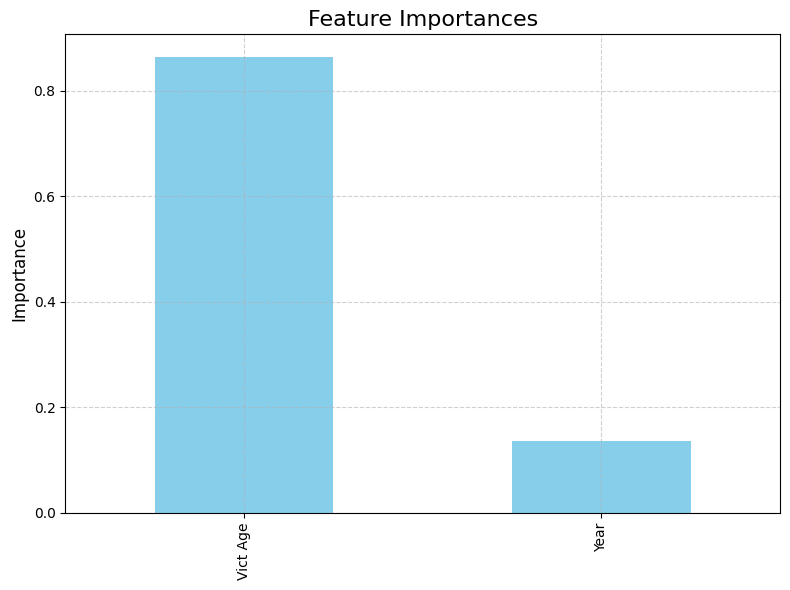

In [50]:
# Filter data to include only male ('M') and female ('F')
filtered_data = filtered_data[filtered_data['Vict Sex'].isin(['M', 'F'])]

# Prepare data
X = filtered_data[['Year', 'Vict Age']]
y = filtered_data['Vict Sex'].apply(lambda x: 1 if x == 'M' else 0)  # Binary encoding: Male=1, Female=0

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_clf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = pd.Series(best_clf.feature_importances_, index=X.columns)

# Display results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print("\nFeature Importances:")
print(feature_importances.sort_values(ascending=False))

plt.figure(figsize=(8, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importances', fontsize=16)
plt.ylabel('Importance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Feature Importance from Random Forest Classifier

The bar plot illustrates the importance of the features used in the Random Forest Classifier to predict the victim's gender (male or female).

#### Key Insights:
- **Victim Age** has the highest importance, contributing approximately **86.4%** to the model's predictive power.
- **Year** contributes significantly less, with an importance of **13.6%**.

#### Model Performance:
- **Best Parameters**: `max_depth=None`, `min_samples_leaf=1`, `min_samples_split=2`, `n_estimators=50`.
- **Accuracy**: **55.74%**.
- **Classification Report**:
  - Male victims (1): Precision and recall are slightly higher than female victims (0).
  - Female victims (0): Performance is consistent but slightly lower.

This analysis highlights that **Victim Age** is a critical factor in predicting the gender of victims in child abuse cases.


## Interpretation: Insights & Policy Decisions

The analysis of child abuse cases in Los Angeles from 2020 to 2023 provides critical insights into the demographics, temporal trends, and geographic distribution of incidents. These findings can guide policy decisions and resource allocation to address this pressing issue effectively.

#### Key Insights:
1. **Temporal Trends**:
   - The yearly distribution of incidents remained relatively stable, with a slight increase in some years.
   - Monthly data shows variations, with some months experiencing spikes in cases. This temporal variability suggests potential underlying factors such as seasonal effects or reporting patterns.

2. **Demographic Insights**:
   - Female victims constitute a slightly higher percentage (53.1%) of reported cases compared to male victims (46.9%).
   - The average age of victims differs significantly between genders, with female victims being slightly older on average than male victims.

3. **Geographic Distribution**:
   - Cases are concentrated in specific areas across Los Angeles, highlighting neighborhoods that may require targeted interventions.
   - Geospatial mapping of incidents shows clusters in urban areas, suggesting the need for localized prevention programs.

4. **Model Findings**:
   - Predictive modeling indicated that **Victim Age** is the most critical factor in distinguishing between male and female victims.
   - The Random Forest model achieved moderate accuracy (55.74%), emphasizing the complexity of predicting victim characteristics from limited variables.

5. **Hypothesis Testing**:
   - There is a statistically significant difference in average victim age between male and female victims.
   - No significant trend in victim age over time was detected, suggesting consistent patterns across years.

#### Policy Recommendations:
1. **Prevention Programs**:
   - Implement targeted awareness campaigns in high-incidence neighborhoods to educate communities about identifying and reporting child abuse.
   - Focus on both genders equally, ensuring programs are inclusive and address the specific vulnerabilities of male and female victims.

2. **Resource Allocation**:
   - Allocate resources to areas with the highest reported cases, as identified through geographic mapping.
   - Increase funding for child protection services during months with historically higher case volumes.

3. **Data-Driven Strategies**:
   - Utilize predictive models to proactively identify potential risk factors and patterns for better intervention planning.
   - Encourage standardized data collection practices to improve model accuracy and enhance insights.

4. **Victim Support Services**:
   - Develop gender-specific support services to address the unique needs of male and female victims.
   - Provide trauma-informed care and counseling to victims and their families to prevent long-term psychological harm.

5. **Policy Enhancements**:
   - Advocate for stricter enforcement of child protection laws and policies to deter perpetrators.
   - Collaborate with schools, healthcare providers, and community organizations to establish a robust reporting and intervention network.

By leveraging these insights, policymakers and child protection agencies can implement targeted, evidence-based interventions to reduce the prevalence of child abuse and provide better support to affected individuals and communities.
